In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(11111111)

In [2]:
# expected return of the 2 stocks
mean_return = 0.01 * np.random.randn(2)
mean_return

array([-0.00798242,  0.00181554])

In [3]:
# random correlation between the 2 stocks
rho = 0.01 * np.random.randn()
rho

0.007129547452251222

In [4]:
# std for the 2 stocks
# must be positive...

sigmas = np.exp(np.random.randn(2))
sigmas

array([2.83423006, 0.50425457])

In [5]:
# covariance matrix
# start with diagonal elements
cov = np.diag(sigmas**2)
cov

array([[8.03286002, 0.        ],
       [0.        , 0.25427267]])

In [6]:
# fill other diagonal..
# same value assigned

sigma12 = sigmas[0] * sigmas[1] * rho
cov[0, 1] = sigma12
cov[1, 0] = sigma12
cov

array([[8.03286002, 0.01018936],
       [0.01018936, 0.25427267]])

In [7]:
# weights of portfolios must sum to 1

def softmax(w):
    a = np.exp(w)
    return a / a.sum()

In [8]:
# generate portfolios, calculate returns/risks...

N = 1000
returns = np.zeros(N)
risks = np.zeros(N)
for i in range(N):
    w = softmax(np.random.randn(2))
    ret = mean_return.dot(w)
    risk = np.sqrt(w.dot(cov).dot(w)) #sqrt of var(w*cov*w)
    returns[i] = ret
    risks[i] = risk

Text(0, 0.5, 'Return')

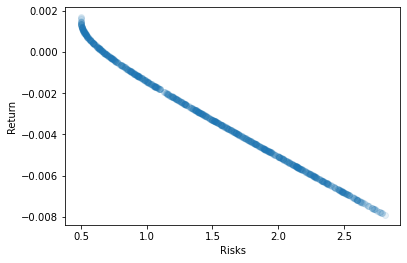

In [9]:
# scatter plot of portfolio with risk (x axis) return (y axis)

plt.scatter(risks, returns, alpha=0.1)
plt.xlabel("Risks")
plt.ylabel("Return")

# ---> negative returns

In [10]:
# different way to generate weights

N = 1000
returns = np.zeros(N)
risks = np.zeros(N)
for i in range(N):
    x = np.random.random() # single random number between 0 and 1
    w = np.array([x, 1-x]) # 2 element array, positive-only
    ret = mean_return.dot(w)
    risk = np.sqrt(w.dot(cov).dot(w)) #sqrt of var(w*cov*w)
    returns[i] = ret
    risks[i] = risk

Text(0, 0.5, 'Return')

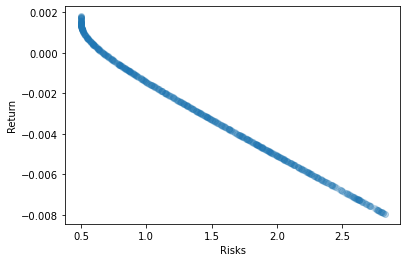

In [11]:
plt.scatter(risks, returns, alpha=0.1)
plt.xlabel("Risks")
plt.ylabel("Return")

# ends a bit darker, because random function doesnt have aversion to extreme values

In [12]:
# allowing short-selling
# weights can be negative

N = 1000
returns = np.zeros(N)
risks = np.zeros(N)
for i in range(N):
    x = np.random.random() - 0.5 # --> values [-0.5, 0.5]
    w = np.array([x, 1-x]) # shprt-selling allowed
    ret = mean_return.dot(w)
    risk = np.sqrt(w.dot(cov).dot(w)) #sqrt of var(w*cov*w)
    returns[i] = ret
    risks[i] = risk

Text(0, 0.5, 'Return')

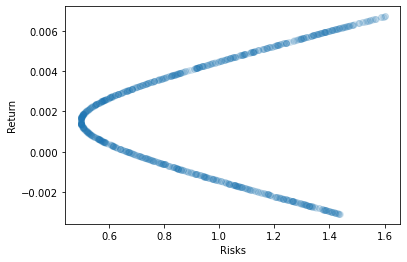

In [13]:
plt.scatter(risks, returns, alpha=0.1)
plt.xlabel("Risks")
plt.ylabel("Return")

# nice full curve
# --> positive return on pf with short-selling allowed
# x[-0.5, 0.5] --> y[0.5, 1.5] --> not symmetric --> more balanced, shuffle weights to get wider range --> y[0.5, 0.5]

### 3-Asset Portfolio

In [14]:
# expected return of the 3 stocks
mean_return = 0.01 * np.random.randn(3)
mean_return

array([-0.00064955, -0.00479921,  0.00296115])

In [15]:
# std for the 3 stocks
# must be positive...

sigmas = np.exp(np.random.randn(3))
sigmas

array([1.06431534, 0.40268065, 1.58583079])

In [16]:
# random correlation between the 3 stocks
rhos = 0.01 * np.random.randn(3)
rhos

array([-0.00528151,  0.01889692, -0.00046375])

In [18]:
# combine sigmas and rhos to generate covariance

cov = np.array([
    [sigmas[0]**2, rhos[0]*sigmas[0]*sigmas[1], rhos[1]*sigmas[0]*sigmas[2]],
    [rhos[0]*sigmas[0]*sigmas[1], sigmas[1]**2, rhos[2]*sigmas[1]*sigmas[2]],
    [rhos[1]*sigmas[0]*sigmas[2], rhos[2]*sigmas[1]*sigmas[2], sigmas[2]**2],
])
cov

array([[ 1.13276715e+00, -2.26354366e-03,  3.18946690e-02],
       [-2.26354366e-03,  1.62151710e-01, -2.96140881e-04],
       [ 3.18946690e-02, -2.96140881e-04,  2.51485929e+00]])

In [19]:
N = 1000
returns = np.zeros(N)
risks = np.zeros(N)
for i in range(N):
    x1, x2 = np.random.random(2) - 0.5 # --> values [-0.5, 0.5]
    w = np.array([x1, x2, 1 - x1 - x2]) # shprt-selling allowed
    np.random.shuffle(w) # shuffle the order for better balance
    ret = mean_return.dot(w)
    risk = np.sqrt(w.dot(cov).dot(w)) #sqrt of var(w*cov*w)
    returns[i] = ret
    risks[i] = risk

Text(0, 0.5, 'Return')

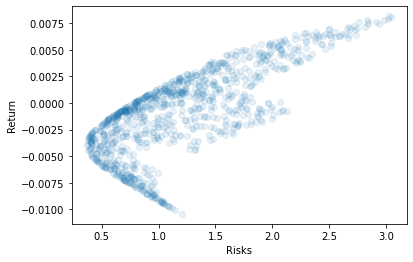

In [20]:
plt.scatter(risks, returns, alpha=0.1)
plt.xlabel("Risks")
plt.ylabel("Return")

# more than 2 assets, points inside the curve